STEP -1 : DATA PREPROCESSING

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
print(df.Sex.unique())
print(df.BP.unique())
print(df.Cholesterol.unique())

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']


In [ ]:
#checking null columns
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

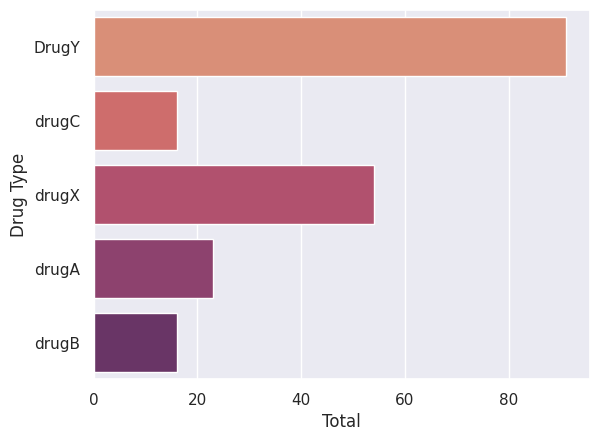

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

<Axes: >

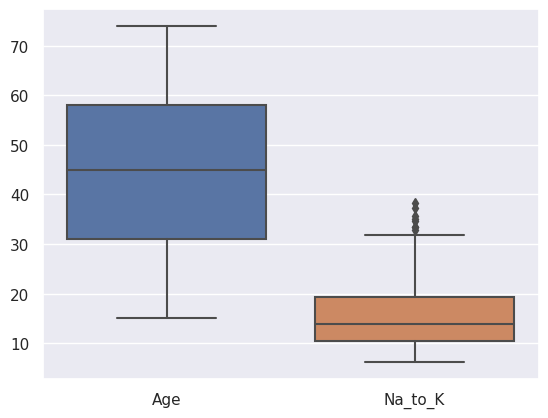

In [ ]:
#checking outliers
sns.boxplot(df)

<Axes: >

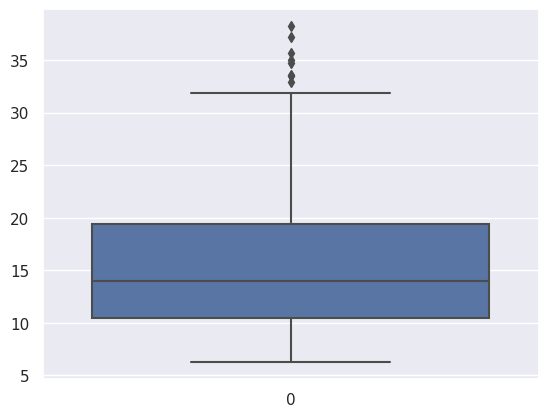

In [ ]:
#Na_to_K have outliers
sns.boxplot(df.Na_to_K)

In [ ]:
#use iqr method to find IQR,Q1,Q3 , UPPERLIMIT AND LOWERLIMIT
Q1 = df.Na_to_K.quantile(0.25)
print('Q1 is ', Q1)
Q3 = df.Na_to_K.quantile(0.75)
print('Q3 is ', Q3)
IQR = Q3 - Q1
print('IQR is ', IQR)
upperlimit = Q3 + (1.5*IQR)
print('upperlimit is ', upperlimit)
lowerlimit = Q1- 1.5*IQR
print('lowerlimit is ', lowerlimit)

Q1 is  10.4455
Q3 is  19.38
IQR is  8.9345
upperlimit is  32.78175
lowerlimit is  -2.9562500000000007


In [ ]:
#now replace where it exceeds upperlimit ,, because data is important

In [ ]:
median_of_col1 = df['Na_to_K'].median()
median_of_col1

13.9365

In [ ]:
#replace with meidan
df['Na_to_K']= np.where(df['Na_to_K']>31,13.93,df['Na_to_K'])

<Axes: >

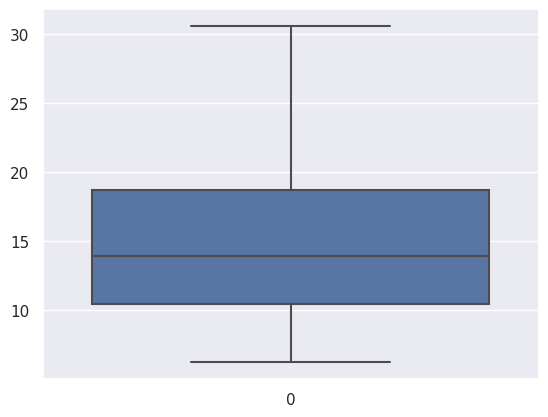

In [ ]:
#To check Na_to_K have outliers
sns.boxplot(df.Na_to_K)
#success in removing outliers

SPLITTING THE DATA

In [ ]:
# shape of the df
df.shape

(200, 6)

#step:1 split the dependent and the independent variable of the dataset

In [ ]:
# dependent variable x (input variable)
x=df.iloc[:,0:5]
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [ ]:
# independent variable y (output variable)
y=df['Drug']
y[0:2]

0    DrugY
1    drugC
Name: Drug, dtype: object

In [ ]:

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 12)

In [ ]:
#Here one hot encoding is used because here many number of categorical values are involved in the dataset
#get_dummies is a pandas function which will convert the one-hot encoding categorical value into numeric value
xtrain = pd.get_dummies(xtrain)
xtest = pd.get_dummies(xtest)

In [ ]:
xtrain.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
77,26,19.161,1,0,1,0,0,0,1
47,68,10.291,0,1,0,1,0,1,0
94,56,15.015,0,1,0,1,0,1,0
14,50,12.703,1,0,0,0,1,1,0
41,58,14.239,1,0,1,0,0,0,1


In [ ]:
xtest.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
23,48,15.036,1,0,0,1,0,1,0
182,20,11.686,1,0,0,1,0,0,1
172,39,17.225,1,0,0,0,1,0,1
21,63,25.917,0,1,0,0,1,1,0
63,45,8.370,0,1,0,1,0,0,1


In [ ]:
ytrain = pd.get_dummies(ytrain)
ytest = pd.get_dummies(ytest)

In [ ]:
ytrain.head()

,DrugY,drugA,drugB,drugC,drugX
77,1,0,0,0,0
47,0,0,0,1,0
94,1,0,0,0,0
14,0,0,0,0,1
41,0,0,1,0,0


In [ ]:
ytest.head()

,DrugY,drugA,drugB,drugC,drugX
23,1,0,0,0,0
182,0,0,0,0,1
172,1,0,0,0,0
21,1,0,0,0,0
63,0,0,0,0,1


In [ ]:
#check the shape of the xtrain xtest
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((160, 9), (40, 9), (160, 5), (40, 5))

BUILD THE ANN MODEL

In [ ]:
#Build an ANN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Create the model
ASISH_VISHNU_model = Sequential()

# Add the input layer and first hidden layer
ASISH_VISHNU_model.add(Dense(48, input_shape=(xtrain.shape[1],), activation='relu'))

# Add additional hidden layers MINIMUM THREEE
ASISH_VISHNU_model.add(Dense(36, activation='relu'))
ASISH_VISHNU_model.add(Dense(24, activation='relu'))
ASISH_VISHNU_model.add(Dense(12, activation='relu'))


# Add the output layer
ASISH_VISHNU_model.add(Dense(ytrain.shape[1], activation='softmax'))


In [ ]:
ASISH_VISHNU_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 48)                480       
                                                                 
 dense_6 (Dense)             (None, 36)                1764      
                                                                 
 dense_7 (Dense)             (None, 24)                888       
                                                                 
 dense_8 (Dense)             (None, 12)                300       
                                                                 
 dense_9 (Dense)             (None, 5)                 65        
                                                                 
Total params: 3,497
Trainable params: 3,497
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
ASISH_VISHNU_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model ----> while training itself we validate here our dataset
ASISH_VISHNU_model.fit(xtrain, ytrain, epochs=25, batch_size=5, validation_data=(xtest, ytest))

Epoch 1/25
32/32 [==============================] - 1s 10ms/step - loss: 1.8023 - accuracy: 0.4688 - val_loss: 1.3447 - val_accuracy: 0.4000
Epoch 2/25
32/32 [==============================] - 0s 4ms/step - loss: 1.1841 - accuracy: 0.4563 - val_loss: 1.1661 - val_accuracy: 0.5000
Epoch 3/25
32/32 [==============================] - 0s 4ms/step - loss: 1.1231 - accuracy: 0.5063 - val_loss: 1.2042 - val_accuracy: 0.4500
Epoch 4/25
32/32 [==============================] - 0s 4ms/step - loss: 1.1001 - accuracy: 0.4875 - val_loss: 1.1033 - val_accuracy: 0.6250
Epoch 5/25
32/32 [==============================] - 0s 4ms/step - loss: 1.0989 - accuracy: 0.5125 - val_loss: 1.1052 - val_accuracy: 0.6000
Epoch 6/25
32/32 [==============================] - 0s 4ms/step - loss: 1.0829 - accuracy: 0.5562 - val_loss: 1.0712 - val_accuracy: 0.6250
Epoch 7/25
32/32 [==============================] - 0s 4ms/step - loss: 1.0465 - accuracy: 0.5750 - val_loss: 1.1664 - val_accuracy: 0.4000
Epoch 8/25
32/32 [=

In [ ]:
#evaluate the model on the test set
test_loss, test_acc=ASISH_VISHNU_model.evaluate(xtest, ytest)
print('Test accuracy:', test_acc * 100)

2/2 [==============================] - 0s 8ms/step - loss: 0.7304 - accuracy: 0.7000
Test accuracy: 69.9999988079071


TESTING THE MODEL

In [ ]:
# # Testing the model
ypred = ASISH_VISHNU_model.predict(xtest)

2/2 [==============================] - 0s 5ms/step


In [ ]:
from operator import index
## Comparing predicted with the actual value
ypred_classes = np.argmax(ypred, axis=1)  # Convert predicted probabilities to class labels

comp = pd.DataFrame({'Actual Value': np.argmax(ytest.values, axis=1),
                     'Predicted Values': ypred_classes})
print(comp)


    Actual Value  Predicted Values
0              0                 0
1              4                 4
2              0                 4
3              0                 0
4              4                 4
5              0                 0
6              1                 1
7              4                 4
8              0                 0
9              3                 0
10             4                 0
11             0                 0
12             4                 0
13             0                 0
14             0                 0
15             2                 1
16             2                 1
17             4                 4
18             4                 4
19             2                 1
20             0                 0
21             0                 0
22             1                 1
23             4                 4
24             4                 4
25             4                 4
26             4                 0
27             0    

In [ ]:
#Predict the output with random value

ASISH_VISHNU_model.predict([[40, 7.370,	0,	1,	0,	1,	0,	0,	1]])

1/1 [==============================] - 0s 94ms/step


array([[0.09044305, 0.04806635, 0.05756815, 0.13840108, 0.6655214 ]],
      dtype=float32)